<a href="https://colab.research.google.com/github/BellwallAmin2001/Battlegrounds-Players-Skills/blob/main/Battleground_skills_Bellwall_Amin_2102053.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
dataset = pd.read_csv('/content/cod.csv')

In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/cod.csv')
dataset.head(1500)

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.000000,0,1,0,0,0,0,0,0.000000,0,0,0,0,0.000000,0,0
1,JohniceRex#9176033,0,0,0.000000,0,1,0,110,0,7,0,7.000000,0,0,0,700,0.000000,0,16
2,bootybootykill#1892064,0,66,1.031250,0,9,0,110,0,32,16,32.000000,0,1,0,48300,0.000000,0,64
3,JNaCo#5244172,3,2,0.400000,0,1,0,0,0,3,0,3.000000,0,0,0,1150,0.000000,0,5
4,gomezyayo_007#6596687,0,2,0.200000,0,1,0,110,0,5,1,5.000000,0,0,0,1000,0.000000,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,QvMxZ#9314244,0,0,0.000000,0,1,0,0,0,0,0,0.000000,0,0,0,0,0.000000,0,0
1496,eddy_steph1108#8582315,8,48,0.510638,5,2,1,0,196,12,9,4.000000,3,19,2552,6765,259.600000,2748,94
1497,MyPxssyStank#5670238,247,4807,0.909727,12,46,12,7,12885,504,1032,2.200873,229,761,40365,695135,194.615476,53250,5284
1498,Reaxian#5376104,54,2270,0.870733,19,32,13,7,9333,126,409,1.800000,70,864,39494,351548,247.138095,48827,2607


In [ ]:
# Drop the name column as it's not useful for prediction
dataset = dataset.drop(columns=['name'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wins            1558 non-null   int64  
 1   kills           1558 non-null   int64  
 2   kdRatio         1558 non-null   float64
 3   killstreak      1558 non-null   int64  
 4   level           1558 non-null   int64  
 5   losses          1558 non-null   int64  
 6   prestige        1558 non-null   int64  
 7   hits            1558 non-null   int64  
 8   timePlayed      1558 non-null   int64  
 9   headshots       1558 non-null   int64  
 10  averageTime     1558 non-null   float64
 11  gamesPlayed     1558 non-null   int64  
 12  assists         1558 non-null   int64  
 13  misses          1558 non-null   int64  
 14  xp              1558 non-null   int64  
 15  scorePerMinute  1558 non-null   float64
 16  shots           1558 non-null   int64  
 17  deaths          1558 non-null   i

In [ ]:
# Define features and target
x = dataset.drop(columns=['kdRatio'])
y = dataset['kdRatio']

In [ ]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Dictionary to store model performances
model_performance = {}

In [ ]:
def evaluate_model(model, model_name, x_train, x_test, y_train, y_test):
    """Evaluate a model and store its performance metrics"""
    start_time = time.time()
    model.fit(x_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
    cv_mean = np.mean(cv_scores)
    cv_std = np.std(cv_scores)

    model_performance[model_name] = {
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'training_time': training_time
    }

    print(f"{model_name} - Test R²: {test_r2:.4f}, Test RMSE: {test_rmse:.4f}, CV Mean R²: {cv_mean:.4f} (±{cv_std:.4f})")

    return model

In [ ]:
# 1. Linear Models
print("Training Linear Models...")
lr_model = evaluate_model(LinearRegression(), 'Linear Regression', x_train_scaled, x_test_scaled, y_train, y_test)
ridge_model = evaluate_model(Ridge(alpha=1.0), 'Ridge Regression', x_train_scaled, x_test_scaled, y_train, y_test)
lasso_model = evaluate_model(Lasso(alpha=0.1), 'Lasso Regression', x_train_scaled, x_test_scaled, y_train, y_test)
elastic_model = evaluate_model(ElasticNet(alpha=0.1, l1_ratio=0.5), 'ElasticNet', x_train_scaled, x_test_scaled, y_train, y_test)

Training Linear Models...
Linear Regression - Test R²: 0.4809, Test RMSE: 0.3119, CV Mean R²: 0.2735 (±0.4351)
Ridge Regression - Test R²: 0.4817, Test RMSE: 0.3116, CV Mean R²: 0.2722 (±0.4401)
Lasso Regression - Test R²: 0.2959, Test RMSE: 0.3632, CV Mean R²: 0.3102 (±0.0164)
ElasticNet - Test R²: 0.3774, Test RMSE: 0.3415, CV Mean R²: 0.3553 (±0.0720)


In [ ]:
# 2. Tree-based Models
print("\nTraining Tree-based Models...")
dt_model = evaluate_model(DecisionTreeRegressor(random_state=42, max_depth=10), 'Decision Tree', x_train, x_test, y_train, y_test)
rf_model = evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42), 'Random Forest', x_train, x_test, y_train, y_test)
gb_model = evaluate_model(GradientBoostingRegressor(n_estimators=100, random_state=42), 'Gradient Boosting', x_train, x_test, y_train, y_test)
ada_model = evaluate_model(AdaBoostRegressor(random_state=42), 'AdaBoost', x_train, x_test, y_train, y_test)
# 3. Advanced Gradient Boosting Models
print("\nTraining Advanced Gradient Boosting Models...")
xgb_model = evaluate_model(XGBRegressor(n_estimators=100, random_state=42, verbosity=0), 'XGBoost', x_train, x_test, y_train, y_test)
lgbm_model = evaluate_model(LGBMRegressor(n_estimators=100, random_state=42, verbose=-1), 'LightGBM', x_train, x_test, y_train, y_test)
cat_model = evaluate_model(CatBoostRegressor(iterations=100, random_state=42, verbose=0), 'CatBoost', x_train, x_test, y_train, y_test)


Training Tree-based Models...
Decision Tree - Test R²: 0.7612, Test RMSE: 0.2115, CV Mean R²: 0.7518 (±0.0328)
Random Forest - Test R²: 0.8913, Test RMSE: 0.1427, CV Mean R²: 0.8660 (±0.0191)
Gradient Boosting - Test R²: 0.8656, Test RMSE: 0.1587, CV Mean R²: 0.8604 (±0.0219)
AdaBoost - Test R²: 0.7091, Test RMSE: 0.2335, CV Mean R²: 0.6933 (±0.0358)

Training Advanced Gradient Boosting Models...
XGBoost - Test R²: 0.9174, Test RMSE: 0.1244, CV Mean R²: 0.9009 (±0.0237)
LightGBM - Test R²: 0.9183, Test RMSE: 0.1237, CV Mean R²: 0.8911 (±0.0306)
CatBoost - Test R²: 0.8896, Test RMSE: 0.1438, CV Mean R²: 0.8703 (±0.0201)


In [ ]:
print("\nTraining Other Models...")
svr_model = evaluate_model(SVR(kernel='rbf', C=1.0), 'SVR', x_train_scaled, x_test_scaled, y_train, y_test)
knn_model = evaluate_model(KNeighborsRegressor(n_neighbors=5), 'K-Neighbors', x_train_scaled, x_test_scaled, y_train, y_test)
mlp_model = evaluate_model(MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42, max_iter=1000), 'Neural Network', x_train_scaled, x_test_scaled, y_train, y_test)
# Create performance comparison DataFrame
performance_df = pd.DataFrame.from_dict(model_performance, orient='index')
performance_df = performance_df.sort_values('test_r2', ascending=False)
print("\n" + "="*80)
print("MODEL PERFORMANCE COMPARISON (Sorted by Test R² Score)")
print("="*80)
print(performance_df[['test_r2', 'test_rmse', 'cv_mean', 'training_time']].round(4))


Training Other Models...
SVR - Test R²: 0.6439, Test RMSE: 0.2583, CV Mean R²: 0.6199 (±0.0935)
K-Neighbors - Test R²: 0.6828, Test RMSE: 0.2438, CV Mean R²: 0.6701 (±0.0349)
Neural Network - Test R²: 0.6844, Test RMSE: 0.2432, CV Mean R²: 0.5076 (±0.2615)

MODEL PERFORMANCE COMPARISON (Sorted by Test R² Score)
                   test_r2  test_rmse  cv_mean  training_time
LightGBM            0.9183     0.1237   0.8911         0.1743
XGBoost             0.9174     0.1244   0.9009         1.3970
Random Forest       0.8913     0.1427   0.8660         1.8594
CatBoost            0.8896     0.1438   0.8703         0.4939
Gradient Boosting   0.8656     0.1587   0.8604         0.6437
Decision Tree       0.7612     0.2115   0.7518         0.0179
AdaBoost            0.7091     0.2335   0.6933         0.2276
Neural Network      0.6844     0.2432   0.5076         0.8846
K-Neighbors         0.6828     0.2438   0.6701         0.0012
SVR                 0.6439     0.2583   0.6199         0.0520
Ridg

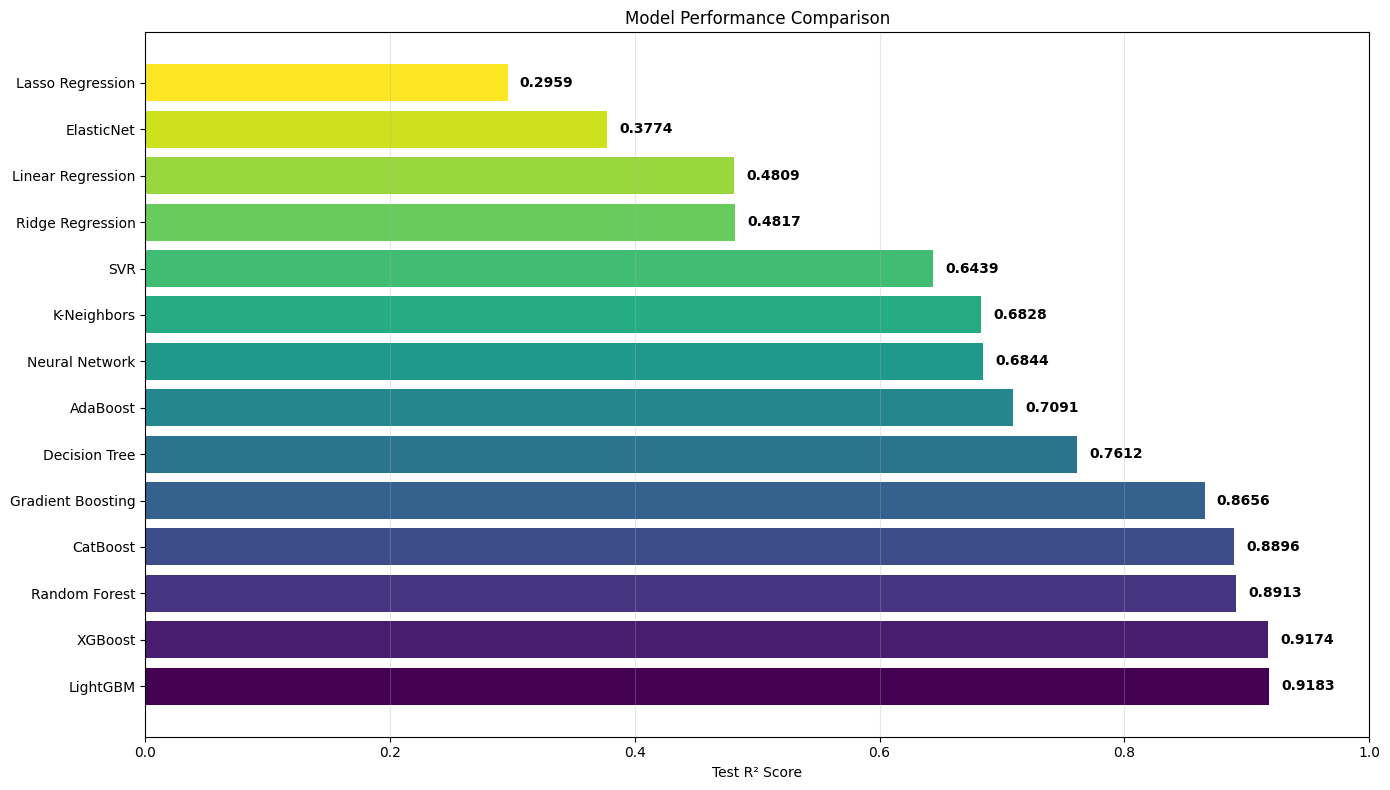

In [ ]:
# Visualize model performance
plt.figure(figsize=(14, 8))
models = performance_df.index
test_r2_scores = performance_df['test_r2']
colors = plt.cm.viridis(np.linspace(0, 1, len(models)))
bars = plt.barh(models, test_r2_scores, color=colors)
plt.xlabel('Test R² Score')
plt.title('Model Performance Comparison')
plt.xlim(0, 1)
plt.grid(axis='x', alpha=0.3)
# Add value labels on bars
for bar, value in zip(bars, test_r2_scores):
    plt.text(value + 0.01, bar.get_y() + bar.get_height()/2, f'{value:.4f}',
             va='center', ha='left', fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
best_model_name = performance_df.index[0]
best_model = None
if best_model_name == 'Linear Regression':
    best_model = lr_model
elif best_model_name == 'Ridge Regression':
    best_model = ridge_model
elif best_model_name == 'Lasso Regression':
    best_model = lasso_model
elif best_model_name == 'ElasticNet':
    best_model = elastic_model
elif best_model_name == 'Decision Tree':
    best_model = dt_model
elif best_model_name == 'Random Forest':
    best_model = rf_model
elif best_model_name == 'Gradient Boosting':
    best_model = gb_model
elif best_model_name == 'AdaBoost':
    best_model = ada_model
elif best_model_name == 'XGBoost':
    best_model = xgb_model
elif best_model_name == 'LightGBM':
    best_model = lgbm_model
elif best_model_name == 'CatBoost':
    best_model = cat_model
elif best_model_name == 'SVR':
    best_model = svr_model
elif best_model_name == 'K-Neighbors':
    best_model = knn_model
elif best_model_name == 'Neural Network':
    best_model = mlp_model

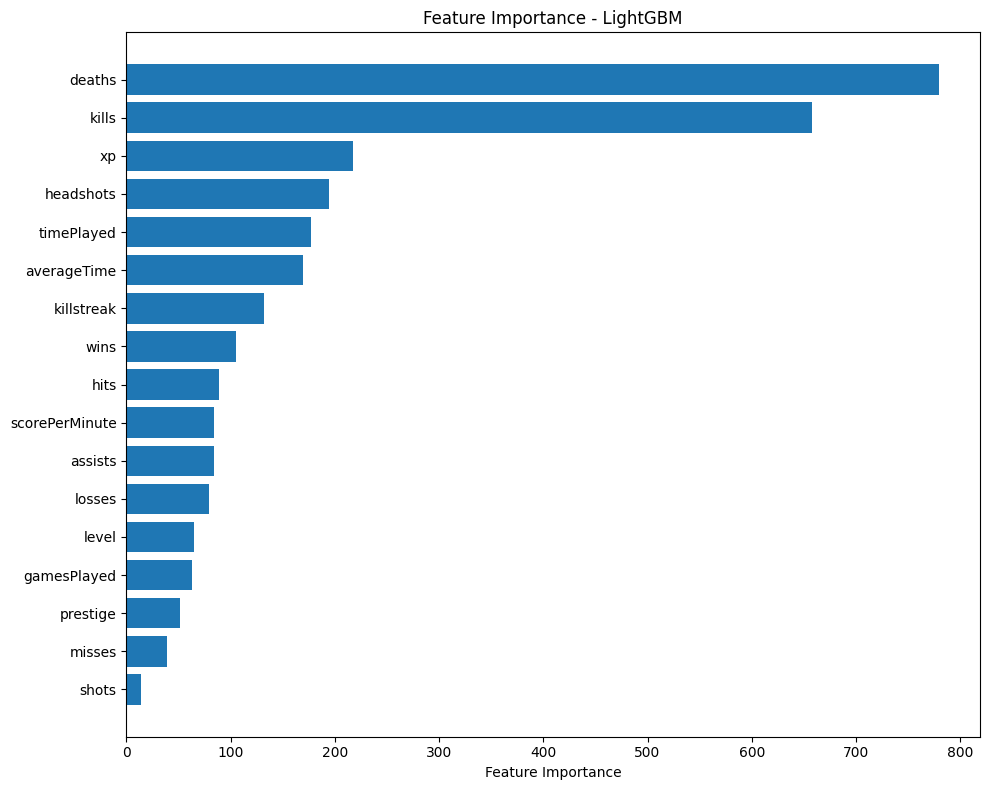


Top 10 Most Important Features for LightGBM:
           feature  importance
16          deaths         780
1            kills         658
13              xp         217
8        headshots         194
7       timePlayed         177
9      averageTime         169
2       killstreak         132
0             wins         105
6             hits          89
14  scorePerMinute          84


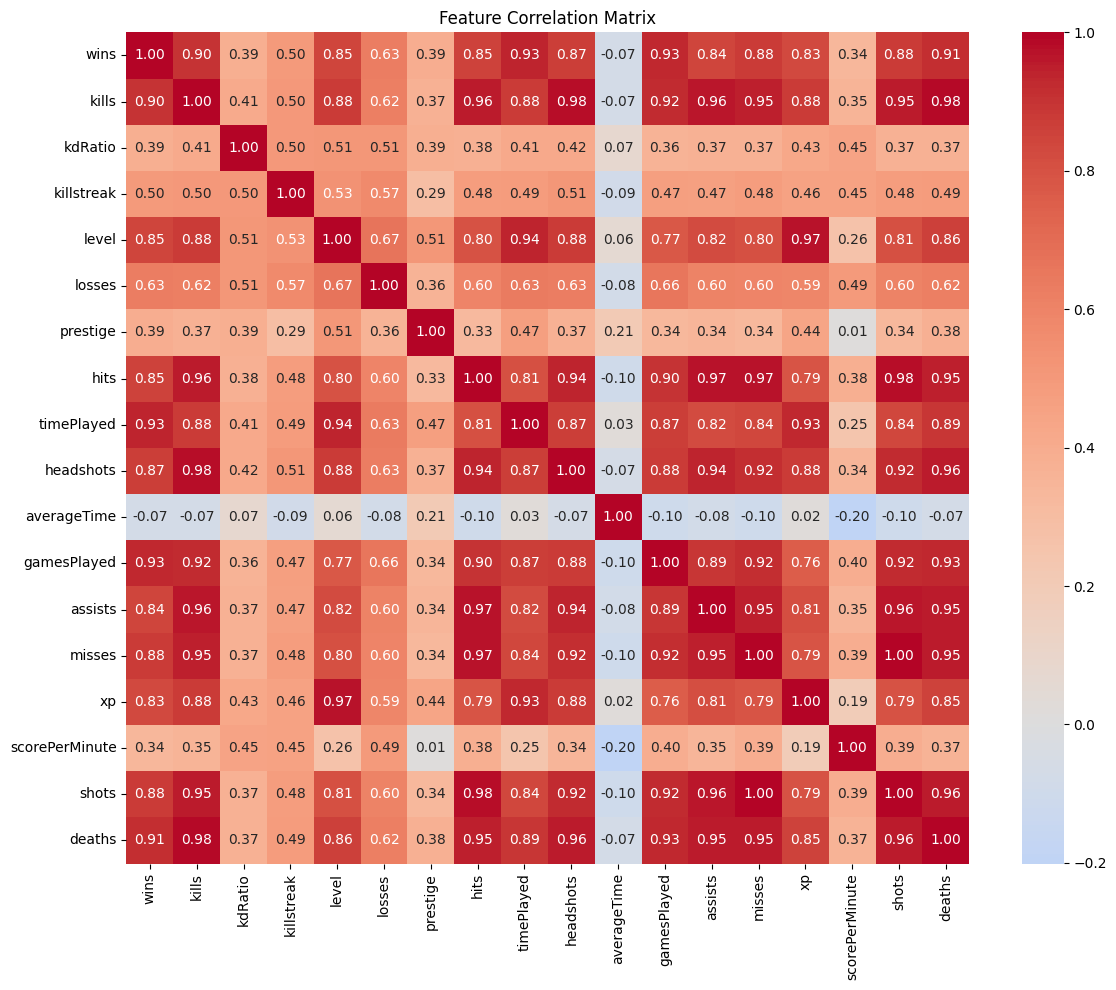

In [ ]:
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': x_train.columns,
        'importance': best_model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    print(f"\nTop 10 Most Important Features for {best_model_name}:")
    print(feature_importance.head(10))
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
# Print final recommendations
print("\n" + "="*80)
print("RECOMMENDATIONS")
print("="*80)
print(f"Best performing model: {best_model_name} (Test R²: {performance_df.loc[best_model_name, 'test_r2']:.4f})")
print("\nNext steps to improve accuracy:")
print("1. Perform hyperparameter tuning on the best model using GridSearchCV")
print("2. Try feature engineering to create new informative features")
print("3. Consider ensemble methods combining top-performing models")
print("4. Analyze prediction errors to understand model weaknesses")
print("5. If possible, collect more data or clean existing data further")


RECOMMENDATIONS
Best performing model: LightGBM (Test R²: 0.9183)

Next steps to improve accuracy:
1. Perform hyperparameter tuning on the best model using GridSearchCV
2. Try feature engineering to create new informative features
3. Consider ensemble methods combining top-performing models
4. Analyze prediction errors to understand model weaknesses
5. If possible, collect more data or clean existing data further
